**Análisis exploratorio de datos de usuarios (EDA) de Waze: profundizando en la retención de usuarios**

**Introducción**

Este reporte continúa el análisis del abandono o la deserción de usuarios (churn) de Waze, profundizando en la exploración de datos y visualizaciones para entender mejor los factores que influyen en la retención de usuarios. El objetivo es proporcionar a Harriet Hadzic, directora de análisis de datos de Waze, información valiosa y procesable para mejorar las estrategias de retención.

Metodología PACE

Este análisis sigue el marco PACE (Plan, Analyze, Construct, Execute) de Google para un enfoque estructurado y orientado a resultados.

Plan - Planificación

Se importaron las librerías necesarias y se cargó el conjunto de datos que contiene información sobre 14,999 usuarios de Waze.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('waze_dataset.csv')

Analyze - Análisis

Se realizó una exploración inicial de los datos, revisando la estructura, los tipos de datos y la presencia de valores faltantes.

In [27]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [28]:
df.size

194987

In [29]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [30]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


**Variables clave:**

* sessions: número de veces que un usuario abrió la aplicación en el último mes.

* drives: número de veces que un usuario condujo al menos 1 km en el último mes.

* total_sessions: estimación del número total de sesiones desde el registro del usuario.

* n_days_after_onboarding: número de días desde el registro del usuario.

* total_navigations_fav1: número total de navegaciones a la ubicación favorita 1 del usuario.

* total_navigations_fav2: número total de navegaciones a la ubicación favorita 2 del usuario.

* driven_km_drives: total de kilómetros conducidos en el último mes.

* duration_minutes_drives: duración total en minutos de conducción en el último mes.

* activity_days: número de días que el usuario abrió la aplicación en el último mes.

* driving_days: número de días que el usuario condujo al menos 1 km en el último mes.

* device: tipo de dispositivo (Android o iPhone).

* label: variable objetivo binaria (retained/churned) - indica si un usuario abandonó en el último mes.

**Datos faltantes:**

Se identificaron 700 filas (4.7%) con valores faltantes en la columna label (churn). Las demás variables están completas.

Construct - Construcción

Se generaron visualizaciones para comprender mejor la distribución de las variables y las relaciones entre ellas.

Distribución de variables numéricas:

Se crearon boxplots e histogramas para las siguientes variables:

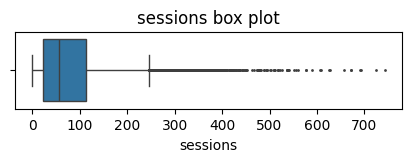

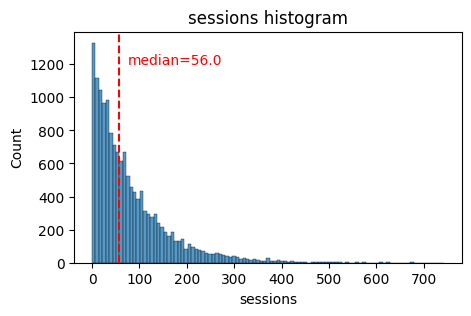

In [31]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions histogram');

Distribución sesgada a la derecha, con una mediana de 56 sesiones en el último mes.

Algunos usuarios tienen más de 700 sesiones, considerados valores atípicos.

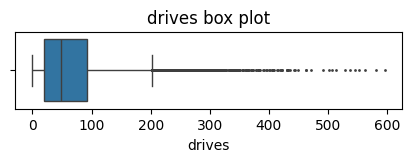

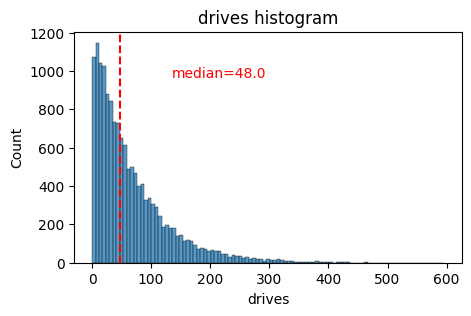

In [32]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

# Función para simplificar la creación de histogramas
def histogrammer(column_str, median_text=True, **kwargs):
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)
    plt.axvline(median, color='red', linestyle='--')
    if median_text==True:
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

histogrammer('drives')

Distribución similar a sessions, sesgada a la derecha, con una mediana de 48 viajes.

Algunos usuarios tienen más de 400 viajes en el último mes.

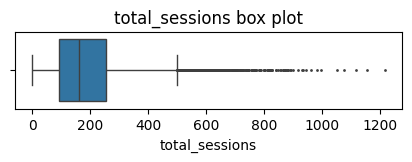

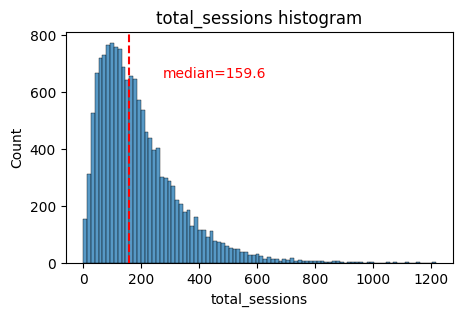

In [33]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

histogrammer('total_sessions')

Distribución sesgada a la derecha, con una mediana de 159.6 sesiones totales.

Un gran número de sesiones totales podrían haberse concentrado en el último mes.

Median: 1741.0


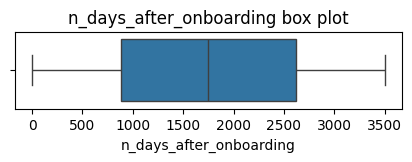

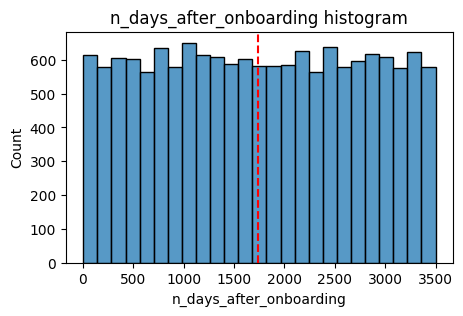

In [34]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

histogrammer('n_days_after_onboarding', median_text=False)

Distribución uniforme, con usuarios registrados entre 0 y ~3,500 días (~9.5 años).

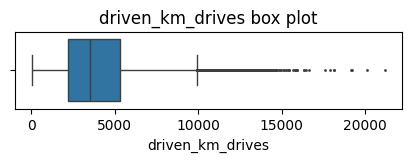

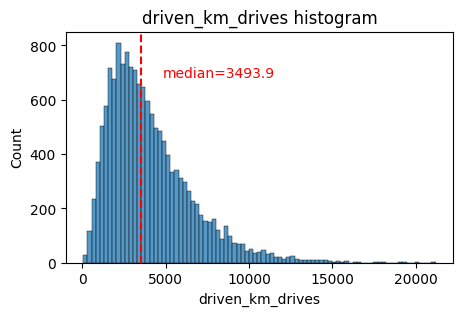

In [35]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

histogrammer('driven_km_drives')

Distribución sesgada a la derecha, con una mediana de 3,495 km conducidos en el último mes.

Algunos usuarios condujeron distancias extraordinariamente largas.

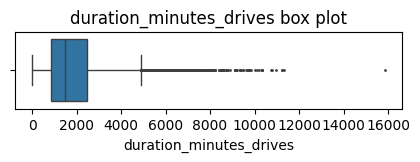

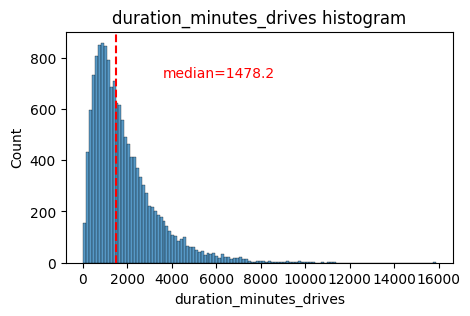

In [36]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

histogrammer('duration_minutes_drives')

Distribución fuertemente sesgada a la derecha, con una mediana de ~1,478 minutos (~25 horas).

Algunos usuarios condujeron más de 250 horas en el último mes.

Median: 16.0


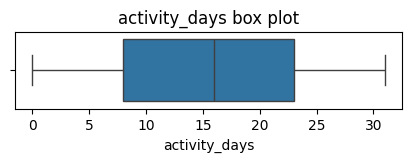

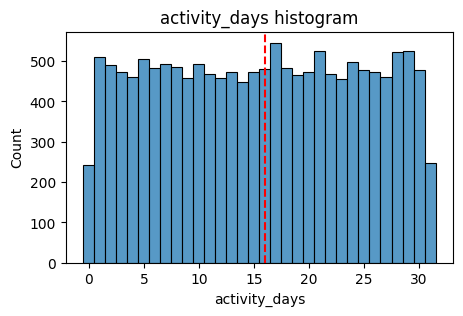

In [37]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

histogrammer('activity_days', median_text=False, discrete=True)

Distribución casi uniforme, con una mediana de 16 días de actividad en el último mes.

~250 usuarios no abrieron la app en absoluto, y ~250 la abrieron todos los días.

Median: 12.0


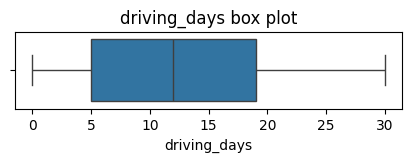

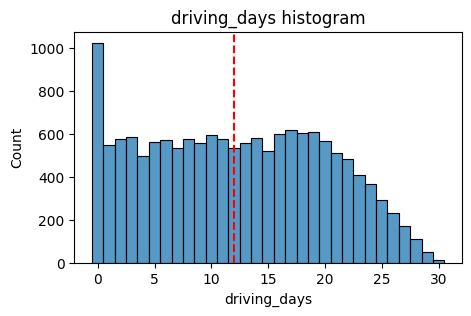

In [38]:
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

histogrammer('driving_days', median_text=False, discrete=True)

Distribución casi uniforme, con una mediana de 12 días de conducción.

~1,000 usuarios no condujeron en absoluto en el último mes.

Variables categóricas:

Se crearon gráficos de pastel para las variables device y label.

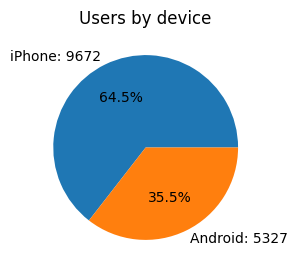

In [39]:
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

Casi el doble de usuarios de iPhone (64.5%) que de Android (35.5%).

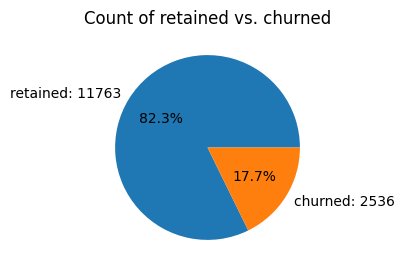

In [40]:
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Tasa de abandono (churn) del 17.7%.

**Relaciones entre variables:**

30
31


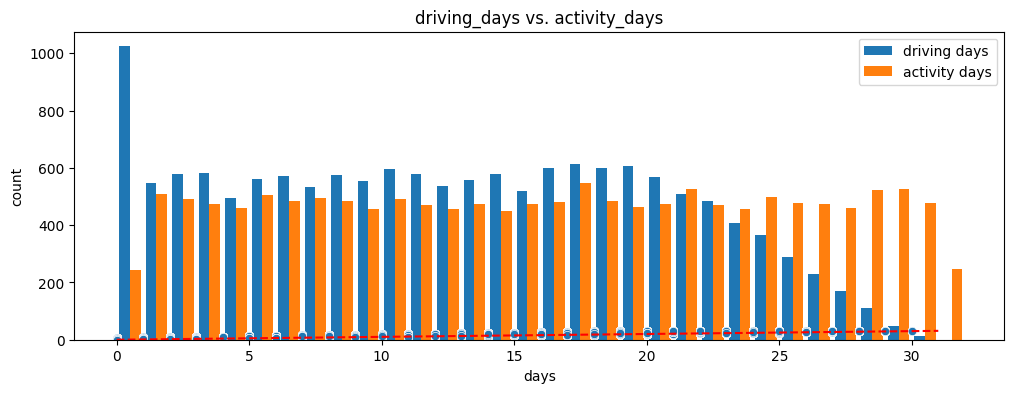

In [ ]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

print(df['driving_days'].max())
print(df['activity_days'].max())

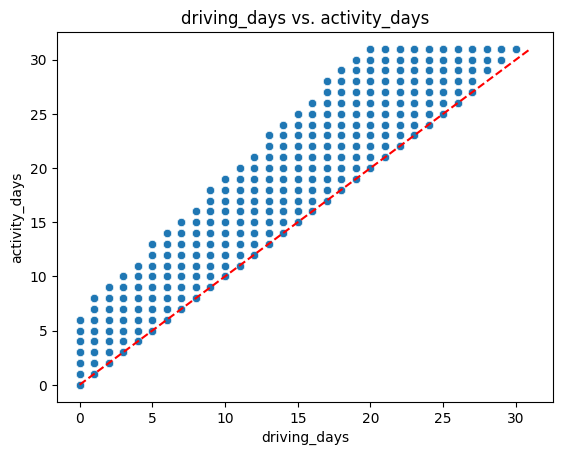

In [47]:
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Hay menos usuarios que no usaron la app en absoluto que usuarios que no condujeron, lo cual es inusual.

Se observa una relación lineal, donde driving_days nunca excede activity_days.

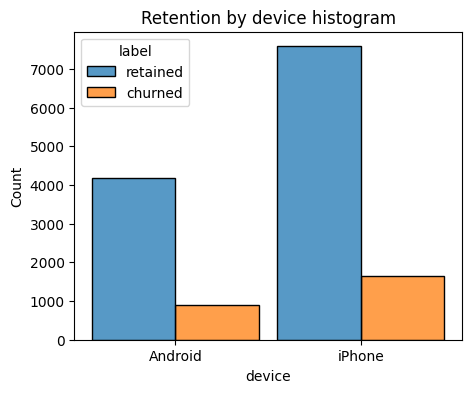

In [42]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

La proporción de churn es similar entre usuarios de iPhone y Android.

/home/edgar/Virtualenv/ts_dl_cookbook/lib64/python3.9/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


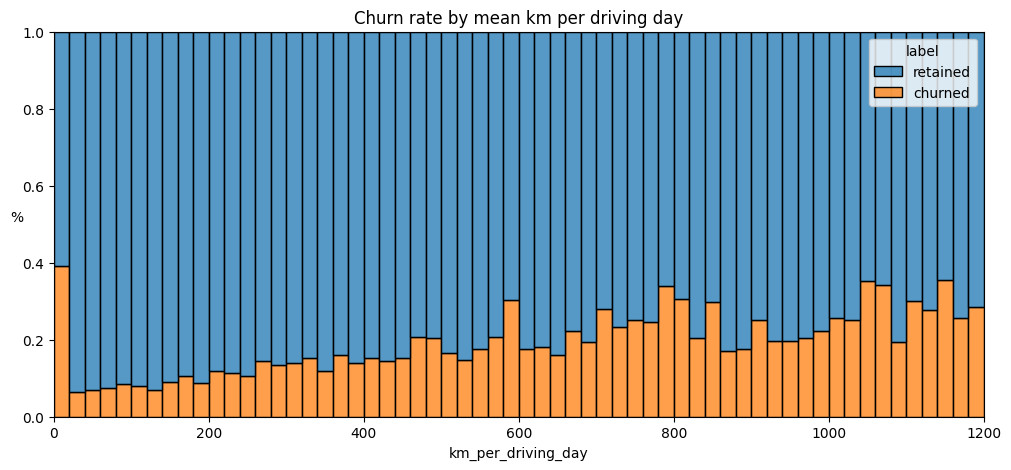

In [43]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

La tasa de churn tiende a aumentar a medida que aumenta la distancia media diaria conducida.

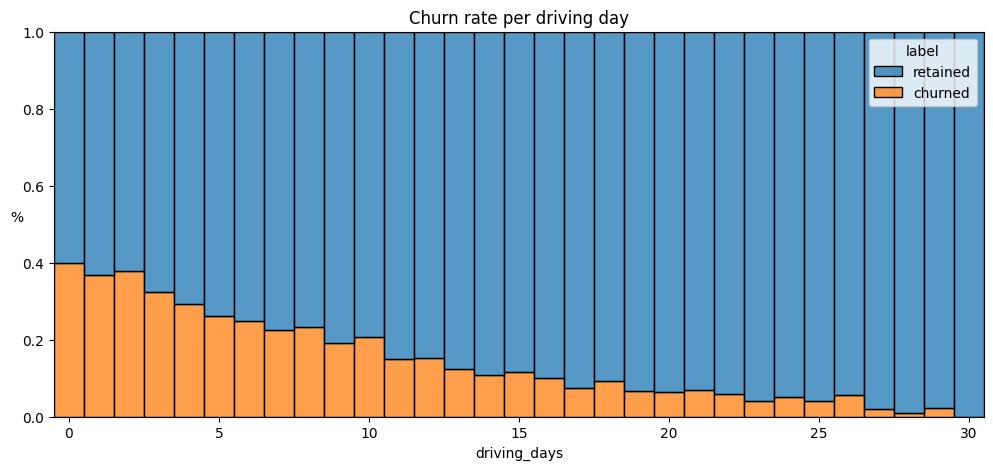

In [44]:
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

La tasa de churn es más alta para los usuarios que menos usaron Waze en el último mes.

Median: 0.4


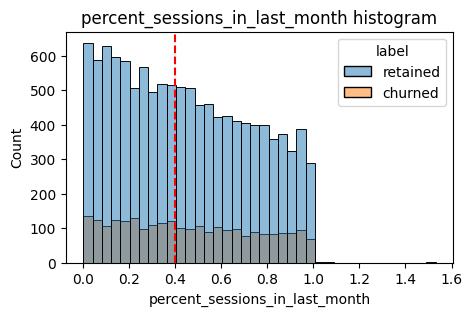

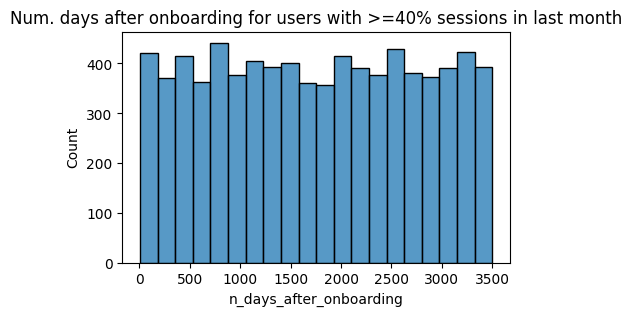

In [45]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].median()

histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

df['n_days_after_onboarding'].median()

data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

La mitad de los usuarios tuvieron el 40% o más de sus sesiones en el último mes.

Muchos usuarios con un tiempo de permanencia prolongado tuvieron un uso inusualmente alto en el último mes.

**Manejo de outliers:**

Se implementó una función para imputar valores atípicos (por encima del percentil 95) con el valor del percentil 95 en las variables sessions, drives, total_sessions, driven_km_drives, duration_minutes_drives.

In [46]:
def outlier_imputer(column_name, percentile):
    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
    outlier_imputer(column, 0.95)

df.describe()

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


**Execute - Ejecución**

**Resultados y evaluación:**

* Distribuciones: la mayoría de las variables están sesgadas a la derecha o distribuidas uniformemente.

* Datos problemáticos: se observaron valores atípicos extremos en driven_km_drives y una posible inconsistencia en el número máximo de días en activity_days (31) y driving_days (30).

* Tasa de abandono (churn): 17.7%, consistente entre dispositivos.

* Factores correlacionados con el churn:

    Positivamente: distancia conducida por día de conducción.

    Negativamente: número de días de conducción.

* Tenencia de usuarios: uniformemente distribuida, desde usuarios nuevos hasta usuarios con ~10 años de antigüedad.

**Conclusión**

Este análisis exploratorio de datos (EDA) de Waze reveló una tasa de churn del 17.7%, consistente entre usuarios de iPhone y Android. Se identificaron patrones de comportamiento distintos entre los usuarios retenidos y los que abandonaron. Los usuarios que condujeron distancias más largas por día de conducción tuvieron una mayor probabilidad de churn, mientras que aquellos que condujeron con más frecuencia mostraron una menor probabilidad. Muchos usuarios de larga data tuvieron un uso inusualmente alto en el último mes, lo que merece una mayor investigación. Se recomienda profundizar en las razones detrás de estos patrones, investigar la causa de los datos faltantes en la variable de churn y segmentar a los usuarios para desarrollar estrategias de retención más efectivas. Este análisis proporciona información valiosa para comprender la deserción de usuarios y sienta las bases para futuros análisis y modelos predictivos.

**Recomendaciones para el cliente:**

* Investigar la causa de los datos faltantes en la variable label.

* Profundizar en el comportamiento de los usuarios con valores atípicos en drives y driven_km_drives.

* Analizar la relación entre la tenencia del usuario y el churn.

* Segmentar a los usuarios por demografía y patrones de uso para identificar factores de riesgo de churn.

* Desarrollar estrategias para reducir el churn, enfocándose en los usuarios que conducen largas distancias por día de conducción y aquellos que usan la app con poca frecuencia.